# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [ ]:
%pip install tensorflow

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [ ]:
data = pd.read_csv('water_potability.csv')

print("Dataset shape:", data.shape)
print("\nDataset info:")
print(data.info())
print("\nTarget distribution:")
print(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset shape: (3276, 10)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

Target distribution:
            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890

Data Preprocessing

In [11]:
# data.fillna(data.mean(), inplace=True)
# X = data.drop("Potability", axis=1)
# y = data["Potability"]
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

print("Missing values before preprocessing:")
print(data.isnull().sum())

data.fillna(data.mean(), inplace=True)

print("\nMissing values after preprocessing:")
print(data.isnull().sum())

# Split dataset into features (X) and target labels (Y)
X = data.drop("Potability", axis=1)
y = data["Potability"]

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nFeatures have been scaled using StandardScaler")

Missing values before preprocessing:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Missing values after preprocessing:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Features shape: (3276, 9)
Target shape: (3276,)

Features have been scaled using StandardScaler


Plot the Data Appropriately

In [12]:

# #from sklearn import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

# Second split: Split the 30% temp into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(X_scaled)*100:.1f}%)")
print(f"Validation set size: {len(X_val)} samples ({len(X_val)/len(X_scaled)*100:.1f}%)")
print(f"Test set size: {len(X_test)} samples ({len(X_test)/len(X_scaled)*100:.1f}%)")

print(f"\nTraining set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")


Training set size: 2293 samples (70.0%)
Validation set size: 491 samples (15.0%)
Test set size: 492 samples (15.0%)

Training set shape: (2293, 9)
Validation set shape: (491, 9)
Test set shape: (492, 9)


# Each Memeber Defines their model Here

In [13]:
def benitha():
    """
    Creates a neural network model for water quality classification with specified hyperparameters:

    HYPERPARAMETER CHOICES:
    - Regularization: L2 (0.01) - Prevents overfitting by penalizing large weights
    - Optimizer: Adam with learning rate 0.0005 - Conservative learning rate for stable convergence
    - Loss: binary_crossentropy - Appropriate for binary classification
    - Metrics: accuracy - Standard metric for classification problems
    - Dropout: 0.3 - 30% dropout rate for regularization without being too aggressive
    - Architecture: 64->32->16->1 neurons - Decreasing layer sizes for feature extraction
    """

    # Get input shape from the features (9 features in water quality dataset)
    input_shape = X_train.shape[1]

    # Build the neural network architecture
    model = keras.Sequential([
        # Input layer
        layers.Dense(64,
                    activation='relu',
                    input_shape=(input_shape,),
                    kernel_regularizer=l2(0.01),
                    name='hidden_layer_1'),

        # Dropout for regularization
        layers.Dropout(0.3, name='dropout_1'),

        # Second hidden layer
        layers.Dense(32,
                    activation='relu',
                    kernel_regularizer=l2(0.01),
                    name='hidden_layer_2'),

        # Dropout for regularization
        layers.Dropout(0.3, name='dropout_2'),

        # Third hidden layer
        layers.Dense(16,
                    activation='relu',
                    kernel_regularizer=l2(0.01),
                    name='hidden_layer_3'),

        # Output layer for binary classification (potable vs non-potable)
        layers.Dense(1, activation='sigmoid', name='output_layer')
    ])

    # Compile the model with specified hyperparameters
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [14]:
print("BENITHA'S HYPERPARAMETER CHOICES AND JUSTIFICATIONS:")
print("="*60)
print("1. REGULARIZATION - L2 (coefficient: 0.01):")
print("   - Chosen to prevent overfitting by adding penalty for large weights")
print("   - L2 regularization creates smoother decision boundaries")
print("   - Coefficient 0.01 provides moderate regularization without being too restrictive")

print("\n2. OPTIMIZER - Adam (learning_rate: 0.0005):")
print("   - Adam combines benefits of AdaGrad and RMSProp with momentum")
print("   - Learning rate 0.0005 is conservative (lower than default 0.001)")
print("   - Ensures stable convergence without overshooting optimal weights")

print("\n3. DROPOUT RATE - 0.3:")
print("   - 30% dropout rate provides effective regularization")
print("   - Not too aggressive (like 0.5) which could harm learning")
print("   - Applied after each hidden layer for consistent regularization")

print("\n4. EARLY STOPPING PARAMETERS:")
print("   - Monitor: 'val_loss' - Stops training when validation loss stops improving")
print("   - Patience: 10 - Allows 10 epochs without improvement before stopping")
print("   - Min_delta: 0.001 - Only improvements >0.001 are considered significant")
print("   - This prevents overfitting and saves computational resources")

BENITHA'S HYPERPARAMETER CHOICES AND JUSTIFICATIONS:
1. REGULARIZATION - L2 (coefficient: 0.01):
   - Chosen to prevent overfitting by adding penalty for large weights
   - L2 regularization creates smoother decision boundaries
   - Coefficient 0.01 provides moderate regularization without being too restrictive

2. OPTIMIZER - Adam (learning_rate: 0.0005):
   - Adam combines benefits of AdaGrad and RMSProp with momentum
   - Learning rate 0.0005 is conservative (lower than default 0.001)
   - Ensures stable convergence without overshooting optimal weights

3. DROPOUT RATE - 0.3:
   - 30% dropout rate provides effective regularization
   - Not too aggressive (like 0.5) which could harm learning
   - Applied after each hidden layer for consistent regularization

4. EARLY STOPPING PARAMETERS:
   - Monitor: 'val_loss' - Stops training when validation loss stops improving
   - Patience: 10 - Allows 10 epochs without improvement before stopping
   - Min_delta: 0.001 - Only improvements >0.00

# Start the training Process

In [15]:
# Create the model
model = benitha()

# Display model architecture
print("MODEL ARCHITECTURE:")
model.summary()

# Define early stopping callback with specified parameters
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
    verbose=1
)

# Train the model
print("\nStarting model training...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

print(f"\nTraining completed after {len(history.history['loss'])} epochs")

MODEL ARCHITECTURE:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4945 - loss: 1.4596 - val_accuracy: 0.6314 - val_loss: 1.1980
Epoch 2/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6006 - loss: 1.1582 - val_accuracy: 0.6314 - val_loss: 0.9994
Epoch 3/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6155 - loss: 0.9759 - val_accuracy: 0.6334 - val_loss: 0.8715
Epoch 4/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6348 - loss: 0.8535 - val_accuracy: 0.6354 - val_loss: 0.7925
Epoch 5/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6160 - loss: 0.7926 - val_accuracy: 0.6436 - val_loss: 0.7429
Epoch 6/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6018 - loss: 0.7522 - val_accuracy: 0.6415 - val_loss: 0.7106
Epoch 7/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6297 - loss: 0.7142 - val_accuracy: 0.6456 - val_loss: 0.6902
Epoch 8/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6224 - loss: 0.700

In [19]:

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Validation Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, val_acc, test_acc))

# Get predictions for test set to calculate additional metrics
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate F1, Precision, and Recall
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

print("="*50)
print("FINAL MODEL PERFORMANCE METRICS")
print("="*50)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("="*50)

Train Accuracy: 0.688, Validation Accuracy: 0.692, Test Accuracy: 0.693
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
FINAL MODEL PERFORMANCE METRICS
Test Accuracy: 0.6931
Test Loss: 0.6306
F1 Score: 0.4215
Precision: 0.7237
Recall: 0.2973


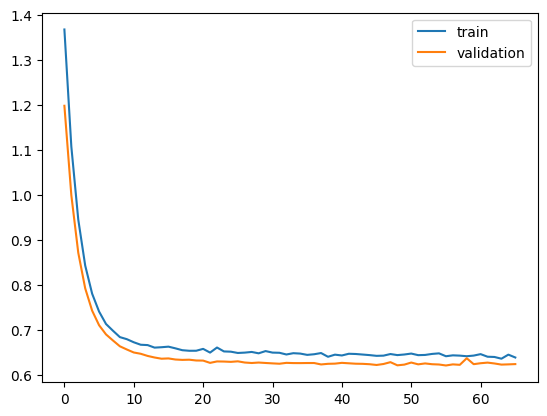

In [17]:
# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()